In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch



import os
import sys
import glob
import h5py
import numpy as np
import math


import torch
from torch import nn
from torch.autograd import Variable
from torchvision import transforms
from torchvision.utils import save_image
from torch.utils.data import Dataset , DataLoader
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo
from tqdm import tqdm
import tensorboard
import tensorboardX
from torch.utils.tensorboard import SummaryWriter


from log import Logger
from data import gDataset, trainDataset, testDataset
from util import r2, mse, rmse, mae, pp_mse, pp_rmse, pp_mae
from model import autoencoder_6,  autoencoder_666,autoencoder_999
from sklearn.decomposition import PCA
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def showres(path):
    img_data_tensor=torch.load(path)
    img_data= img_data_tensor[4].numpy()
    img_data.resize(56,56)
    plt.imshow(img_data)
    return img_data

def to_img(x):   # image size 56 * 56 
    x = x.view(x.size(0), 1, 56, 56)
    return x



test_dataset = testDataset()
test_dataloader= DataLoader(dataset=test_dataset, batch_size=3000,shuffle=False)


# after 100 iterations 

there are 1840 out of 2304 parameters in Z are zeros. 
Therefore, latent Z has 464 non-zero parameters.


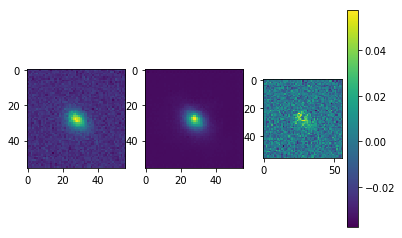

In [2]:

num=100

model = autoencoder_999().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img924/exp903_{}.pth'.format(num)))    
model.eval()


for data in test_dataloader:
    test_img = data
    test_img = test_img.type(torch.float32)
    test_img = test_img.view(test_img.size(0), 1,56,56)
    test_img = test_img.cuda()
    test_output,test_latent = model(test_img)

    
dt_test = (test_latent.data.cpu().numpy()).reshape([3000,-1])
mean_expZ=np.mean(dt_test,axis=0)
#plt.hist(mean_expZ,bins=100);
counts,edges = np.histogram(mean_expZ,bins=100)
print("there are",counts[0],"out of 2304 parameters in Z are zeros. ")
print("Therefore, latent Z has", 2304-counts[0],"non-zero parameters.")

res_in =  test_img.data.cpu().numpy()   
res_out=test_output.data.cpu().numpy()

img_in=res_in[400][0]
img_out=res_out[400][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()



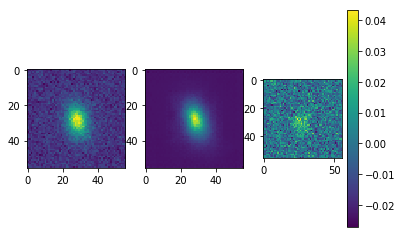

In [3]:
img_in=res_in[10][0]
img_out=res_out[10][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()


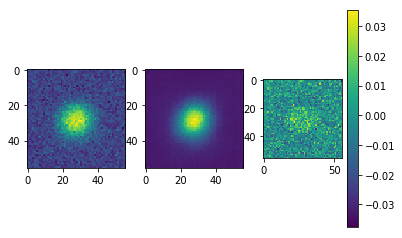

In [4]:
img_in=res_in[20][0]
img_out=res_out[20][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()


# after 5000 iterations 

there are 2000 out of 2304 parameters in Z are zeros. 
Therefore, latent Z has 304 non-zero parameters.


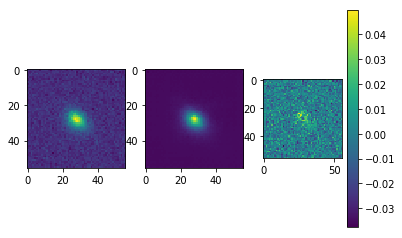

In [5]:

num=5000

model = autoencoder_999().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img924/exp903_{}.pth'.format(num)))    
model.eval()


for data in test_dataloader:
    test_img = data
    test_img = test_img.type(torch.float32)
    test_img = test_img.view(test_img.size(0), 1,56,56)
    test_img = test_img.cuda()
    test_output,test_latent = model(test_img)

    
dt_test = (test_latent.data.cpu().numpy()).reshape([3000,-1])
mean_expZ=np.mean(dt_test,axis=0)
#plt.hist(mean_expZ,bins=100);
counts,edges = np.histogram(mean_expZ,bins=100)
print("there are",counts[0],"out of 2304 parameters in Z are zeros. ")
print("Therefore, latent Z has", 2304-counts[0],"non-zero parameters.")

res_in =  test_img.data.cpu().numpy()   
res_out=test_output.data.cpu().numpy()

img_in=res_in[400][0]
img_out=res_out[400][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()



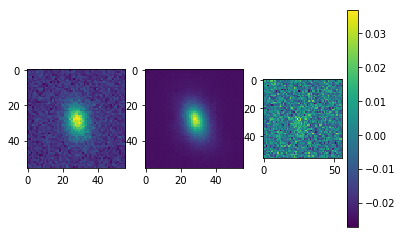

In [6]:
img_in=res_in[10][0]
img_out=res_out[10][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()


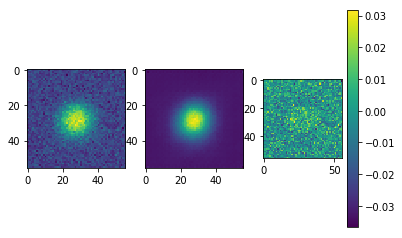

In [7]:
img_in=res_in[20][0]
img_out=res_out[20][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()


# after 10000 iterations 

there are 1822 out of 2304 parameters in Z are zeros. 
Therefore, latent Z has 482 non-zero parameters.


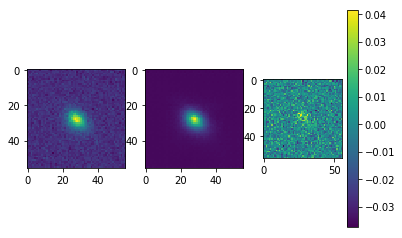

In [7]:

num=10000

model = autoencoder_999().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img924/exp903_{}.pth'.format(num)))    
model.eval()


for data in test_dataloader:
    test_img = data
    test_img = test_img.type(torch.float32)
    test_img = test_img.view(test_img.size(0), 1,56,56)
    test_img = test_img.cuda()
    test_output,test_latent = model(test_img)

    
dt_test = (test_latent.data.cpu().numpy()).reshape([3000,-1])
mean_expZ=np.mean(dt_test,axis=0)
#plt.hist(mean_expZ,bins=100);
counts,edges = np.histogram(mean_expZ,bins=100)
print("there are",counts[0],"out of 2304 parameters in Z are zeros. ")
print("Therefore, latent Z has", 2304-counts[0],"non-zero parameters.")

res_in =  test_img.data.cpu().numpy()   
res_out=test_output.data.cpu().numpy()

img_in=res_in[400][0]
img_out=res_out[400][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()



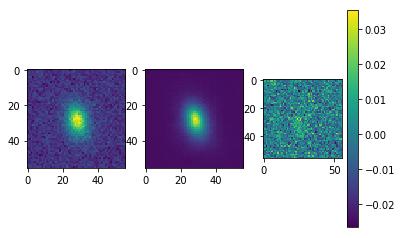

In [8]:
img_in=res_in[10][0]
img_out=res_out[10][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()


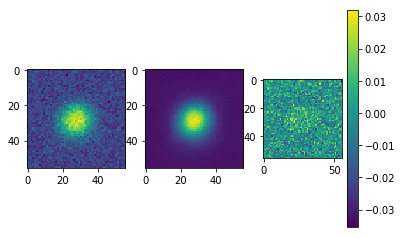

In [9]:
img_in=res_in[20][0]
img_out=res_out[20][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()


# after 19990 iterations 

there are 2046 out of 2304 parameters in Z are zeros. 
Therefore, latent Z has 258 non-zero parameters.


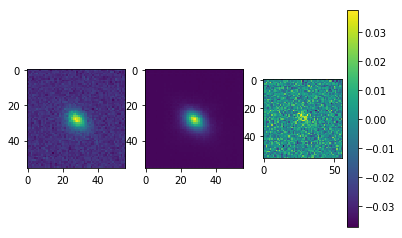

In [10]:

num=19990

model = autoencoder_999().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img924/exp903_{}.pth'.format(num)))    
model.eval()


for data in test_dataloader:
    test_img = data
    test_img = test_img.type(torch.float32)
    test_img = test_img.view(test_img.size(0), 1,56,56)
    test_img = test_img.cuda()
    test_output,test_latent = model(test_img)

    
dt_test = (test_latent.data.cpu().numpy()).reshape([3000,-1])
mean_expZ=np.mean(dt_test,axis=0)
#plt.hist(mean_expZ,bins=100);
counts,edges = np.histogram(mean_expZ,bins=100)
print("there are",counts[0],"out of 2304 parameters in Z are zeros. ")
print("Therefore, latent Z has", 2304-counts[0],"non-zero parameters.")

res_in =  test_img.data.cpu().numpy()   
res_out=test_output.data.cpu().numpy()

img_in=res_in[400][0]
img_out=res_out[400][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()



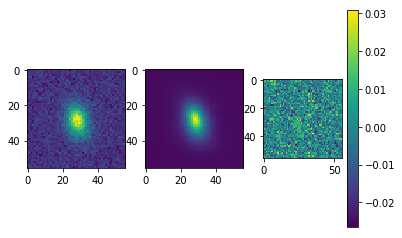

In [11]:
img_in=res_in[10][0]
img_out=res_out[10][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()


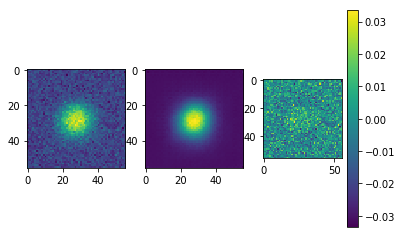

In [12]:
img_in=res_in[20][0]
img_out=res_out[20][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()


# after 19990+15000 = 34990 iterations 

there are 2041 out of 2304 parameters in Z are zeros. 
Therefore, latent Z has 263 non-zero parameters.


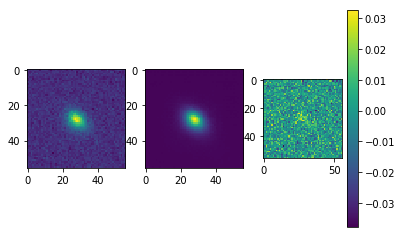

In [13]:

num=15000

model = autoencoder_999().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img924/exp903_2_{}.pth'.format(num)))    
model.eval()


for data in test_dataloader:
    test_img = data
    test_img = test_img.type(torch.float32)
    test_img = test_img.view(test_img.size(0), 1,56,56)
    test_img = test_img.cuda()
    test_output,test_latent = model(test_img)

    
dt_test = (test_latent.data.cpu().numpy()).reshape([3000,-1])
mean_expZ=np.mean(dt_test,axis=0)
#plt.hist(mean_expZ,bins=100);
counts,edges = np.histogram(mean_expZ,bins=100)
print("there are",counts[0],"out of 2304 parameters in Z are zeros. ")
print("Therefore, latent Z has", 2304-counts[0],"non-zero parameters.")

res_in =  test_img.data.cpu().numpy()   
res_out=test_output.data.cpu().numpy()

img_in=res_in[400][0]
img_out=res_out[400][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()



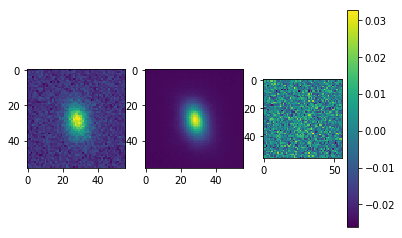

In [14]:
img_in=res_in[10][0]
img_out=res_out[10][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()


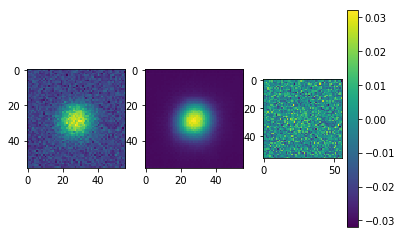

In [15]:
img_in=res_in[20][0]
img_out=res_out[20][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()


# after 19990+19990 = 39980 iterations 

there are 2017 out of 2304 parameters in Z are zeros. 
Therefore, latent Z has 287 non-zero parameters.


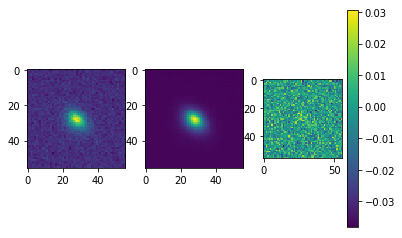

In [16]:

num=19990

model = autoencoder_999().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img924/exp903_2_{}.pth'.format(num)))    
model.eval()


for data in test_dataloader:
    test_img = data
    test_img = test_img.type(torch.float32)
    test_img = test_img.view(test_img.size(0), 1,56,56)
    test_img = test_img.cuda()
    test_output,test_latent = model(test_img)

    
dt_test = (test_latent.data.cpu().numpy()).reshape([3000,-1])
mean_expZ=np.mean(dt_test,axis=0)
#plt.hist(mean_expZ,bins=100);
counts,edges = np.histogram(mean_expZ,bins=100)
print("there are",counts[0],"out of 2304 parameters in Z are zeros. ")
print("Therefore, latent Z has", 2304-counts[0],"non-zero parameters.")

res_in =  test_img.data.cpu().numpy()   
res_out=test_output.data.cpu().numpy()

img_in=res_in[400][0]
img_out=res_out[400][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()



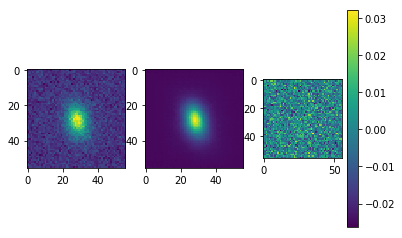

In [17]:
img_in=res_in[10][0]
img_out=res_out[10][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()


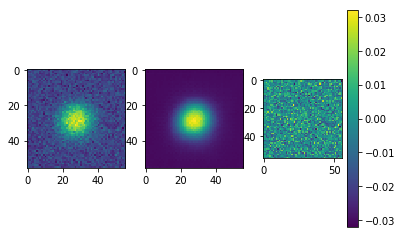

In [18]:
img_in=res_in[20][0]
img_out=res_out[20][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()
